In [178]:
# load data from wandb
# workspace dir: https://wandb.ai/cv_lab/Metaworld%20multi-task%20environment?nw=nwuserahmedsalah5262612
# # load from the project
import wandb
api = wandb.Api()
entity = "cv_lab"
project = "Metaworld multi-task environment"

runs = api.runs(f"{entity}/{project}")

# get the last 30 runs
run_list = []
for run in runs:
    run_list.append(run)

print(f"Total runs: {len(run_list)}")

Total runs: 139


In [179]:
target_run = run_list[-30:]

# print the names of the runs
for run in target_run:
    print(run.name)

button-press-topdown-v2_Mid_ID3
button-press-v2_Right_ID3
button-press-topdown-v2_Left_ID3
button-press-v2_Mid_ID3
button-press-topdown-v2_Right_ID3
button-press-v2_Left_ID3
coffee-button-v2_Right_ID3
coffee-button-v2_Mid_ID3
coffee-button-v2_Left_ID3
window-open-v2_Right_ID3
window-open-v2_Mid_ID3
window-open-v2_Left_ID3
faucet-open-v2_Right_ID3
faucet-open-v2_Mid_ID3
faucet-open-v2_Left_ID3
faucet-close-v2_Right_ID3
faucet-close-v2_Mid_ID3
faucet-close-v2_Left_ID3
door-open-v2_Right_ID3
door-lock-v2_Left_ID3
door-open-v2_Mid_ID3
door-open-v2_Left_ID3
door-lock-v2_Right_ID3
door-lock-v2_Mid_ID3
handle-press-v2_Left_ID3
drawer-open-v2_Right_ID3
drawer-open-v2_Mid_ID3
drawer-open-v2_Left_ID3
handle-press-v2_Right_ID3
handle-press-v2_Mid_ID3


In [194]:
import tqdm
# get the charts data from the runs
from collections import defaultdict
ep_len_mean  = defaultdict(lambda: defaultdict(lambda: None))
ep_rew_mean  = defaultdict(lambda: defaultdict(lambda: None))
success_rate_mean = defaultdict(lambda: defaultdict(lambda: None))
for run in target_run:
    run_id = run.id
    for i in tqdm.tqdm(range(10)):
        run = api.run(f"{entity}/{project}/{run.id}")
        run.update()  
        run_name = run.name
        dt = run.history()
        dt_len = dt[dt['rollout/ep_len_mean'].notnull()]
        for row, v in dt_len.iterrows():
            global_step = v["global_step"]
            m = v["rollout/ep_len_mean"]
            ep_len_mean[run_name][global_step] = m
        
        dt_rew = dt[dt['rollout/ep_rew_mean'].notnull()]
        for row, v in dt_rew.iterrows():
            global_step = v["global_step"]
            m = v["rollout/ep_rew_mean"]
            ep_rew_mean[run_name][global_step] = m
        
        dt_success = dt[dt['rollout/success_rate'].notnull()]
        for row, v in dt_success.iterrows():
            global_step = v["global_step"]
            m = v["rollout/success_rate"]
            success_rate_mean[run_name][global_step] = m




  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


In [200]:
sorted_ep_len_mean  = {}
sorted_ep_rew_mean  = {}
sorted_success_rate = {}

for run_name in ep_len_mean.keys():
    sorted_ep_len_mean[run_name] = dict(sorted(ep_len_mean[run_name].items()))
    sorted_ep_rew_mean[run_name] = dict(sorted(ep_rew_mean[run_name].items()))
    sorted_success_rate[run_name] = dict(sorted(success_rate_mean[run_name].items()))


In [201]:

max_global_step = 0
for run_name in sorted_ep_len_mean.keys():
    max_global_step = max(max_global_step, max(sorted_ep_len_mean[run_name].keys()))
    
for run_name in sorted_ep_rew_mean.keys():
    max_global_step = max(max_global_step, max(sorted_ep_rew_mean[run_name].keys()))

for run_name in sorted_success_rate.keys():
    max_global_step = max(max_global_step, max(sorted_success_rate[run_name].keys()))

print(f"Max global step: {max_global_step}")

Max global step: 1999920.0


In [202]:
global_steps = []
for k, v in sorted_ep_len_mean.items():
    global_steps.extend(v.keys())
for k, v in sorted_ep_rew_mean.items():
    global_steps.extend(v.keys())
for k, v in sorted_success_rate.items():
    global_steps.extend(v.keys())

global_steps = list(set(global_steps))

print(f"Total global steps: {len(global_steps)}")


Total global steps: 12179


In [203]:
for run in target_run:
    run_name = run.name
    print(f"Run: {run_name}")
    print(f"Ep len mean: {len(sorted_ep_len_mean[run_name])}")
    print(f"Ep rew mean: {len(sorted_ep_rew_mean[run_name])}")
    print(f"Success rate: {len(sorted_success_rate[run_name])}")
    

Run: button-press-topdown-v2_Mid_ID3
Ep len mean: 378
Ep rew mean: 378
Success rate: 378
Run: button-press-v2_Right_ID3
Ep len mean: 411
Ep rew mean: 411
Success rate: 411
Run: button-press-topdown-v2_Left_ID3
Ep len mean: 423
Ep rew mean: 423
Success rate: 423
Run: button-press-v2_Mid_ID3
Ep len mean: 420
Ep rew mean: 420
Success rate: 420
Run: button-press-topdown-v2_Right_ID3
Ep len mean: 426
Ep rew mean: 426
Success rate: 426
Run: button-press-v2_Left_ID3
Ep len mean: 403
Ep rew mean: 403
Success rate: 403
Run: coffee-button-v2_Right_ID3
Ep len mean: 358
Ep rew mean: 358
Success rate: 358
Run: coffee-button-v2_Mid_ID3
Ep len mean: 406
Ep rew mean: 406
Success rate: 406
Run: coffee-button-v2_Left_ID3
Ep len mean: 365
Ep rew mean: 365
Success rate: 365
Run: window-open-v2_Right_ID3
Ep len mean: 405
Ep rew mean: 405
Success rate: 405
Run: window-open-v2_Mid_ID3
Ep len mean: 399
Ep rew mean: 399
Success rate: 399
Run: window-open-v2_Left_ID3
Ep len mean: 388
Ep rew mean: 388
Success ra

In [206]:
# plot the data as a distibution with mean and std of the different runs along time steps

import matplotlib.pyplot as plt
import numpy as np

min_len_len_mean = min(len(v) for k,v in sorted_ep_len_mean.items())
min_len_rew_mean = min(len(v) for k,v in sorted_ep_rew_mean.items())
min_len_success_rate = min(len(v) for k,v in sorted_success_rate.items())

len_mean = np.zeros((len(sorted_ep_len_mean), min_len_len_mean))
rew_mean = np.zeros((len(sorted_ep_len_mean), min_len_rew_mean))
success_rate = np.zeros((len(sorted_ep_len_mean), min_len_success_rate))

# to numpy
for i, (run_name, v) in enumerate(sorted_ep_len_mean.items()):
    len_mean[i] = np.array(list(v.values())[:min_len_len_mean])
    rew_mean[i] = np.array(list(sorted_ep_rew_mean[run_name].values())[:min_len_rew_mean])
    success_rate[i] = np.array(list(sorted_success_rate[run_name].values())[:min_len_success_rate])
    
min_len = min(min_len_len_mean, min_len_rew_mean, min_len_success_rate)
x_axis = global_steps[:min_len]


print(len(np.mean(len_mean, axis=0)))
print(len(np.mean(rew_mean, axis=0)))
print(len(np.mean(success_rate, axis=0)))
print(len(x_axis))

358
358
358
358


In [213]:
x_axis = np.array(sorted(x_axis))

In [214]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


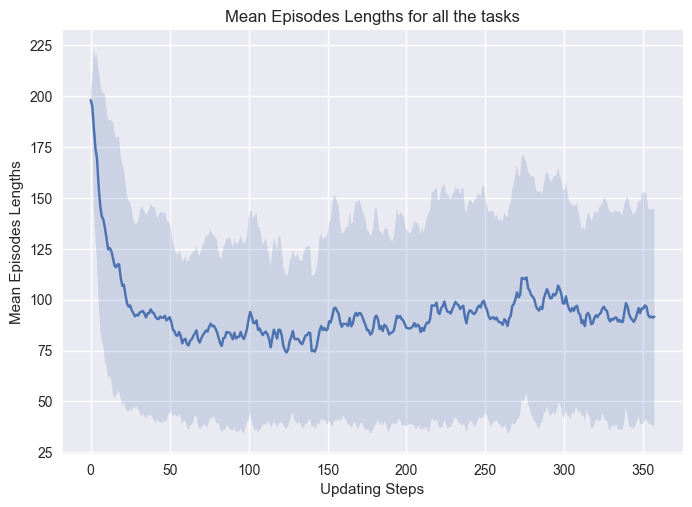

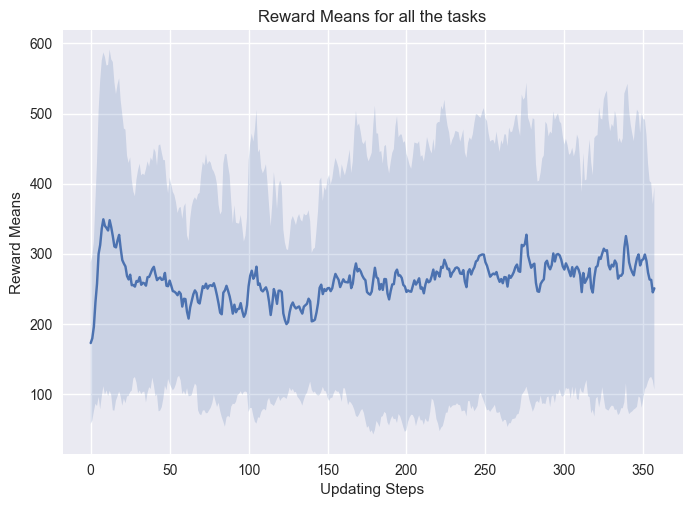

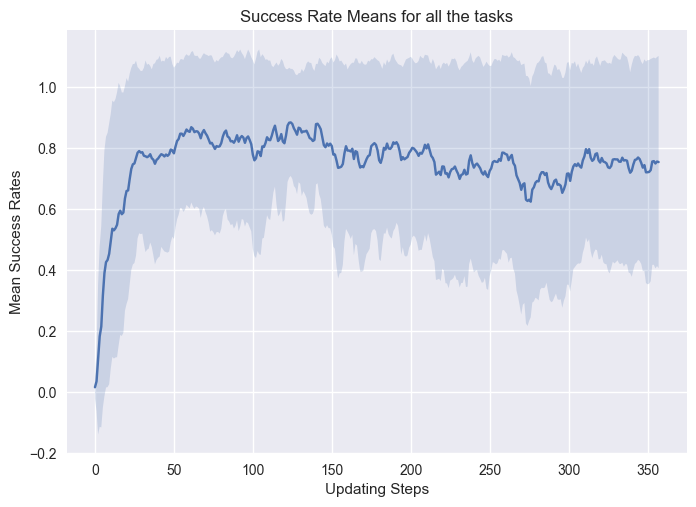

In [221]:
# ploting style 
# sytle 1 = ggplot
# style 2 = 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid'
# style 3 = classic
# style 4 = five-thirty-eight
plt.style.use('seaborn-v0_8')

# limit the plot to the end of the x axis



# plot the data
plt.figure()
plt.plot(np.mean(len_mean, axis=0))
plt.fill_between(np.arange(min_len_len_mean), np.mean(len_mean, axis=0) - np.std(len_mean, axis=0), np.mean(len_mean, axis=0) + np.std(len_mean, axis=0), alpha=0.2)
plt.title('Mean Episodes Lengths for all the tasks')
# y axis for the episodic length means
# x for the logging steps
plt.xlabel('Updating Steps')
plt.ylabel('Mean Episodes Lengths')
plt.show()

plt.figure()
plt.plot(np.mean(rew_mean, axis=0))
plt.fill_between(np.arange(min_len_rew_mean), np.mean(rew_mean, axis=0) - np.std(rew_mean, axis=0), np.mean(rew_mean, axis=0) + np.std(rew_mean, axis=0), alpha=0.2)
plt.title('Reward Means for all the tasks')
plt.xlabel('Updating Steps')
plt.ylabel('Reward Means')
plt.show()


plt.figure()
plt.plot(np.mean(success_rate, axis=0))
plt.fill_between(np.arange(min_len_success_rate), np.mean(success_rate, axis=0) - np.std(success_rate, axis=0), np.mean(success_rate, axis=0) + np.std(success_rate, axis=0), alpha=0.2)
plt.title('Success Rate Means for all the tasks')
plt.xlabel('Updating Steps')
plt.ylabel('Mean Success Rates')
plt.show()




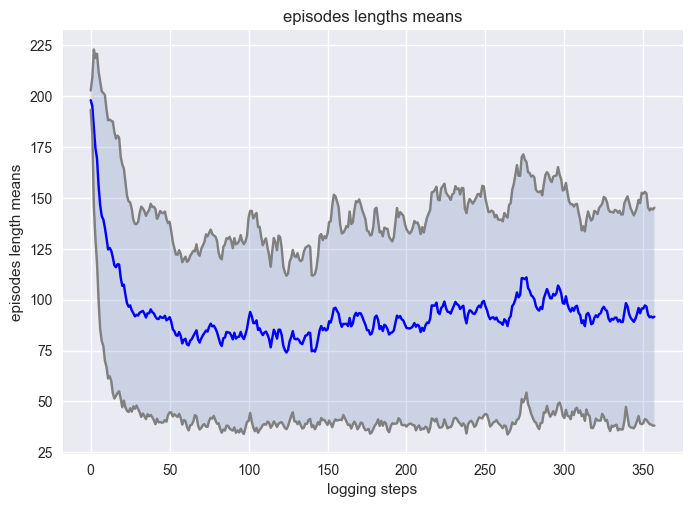

In [219]:
# add the max and min to the plots 
plt.figure()
# plot color 

mean_1 = np.mean(len_mean, axis=0)
std_1 = np.std(len_mean, axis=0)
mean_std_1_1 = mean_1 + std_1
mean_std_1_2 = mean_1 - std_1
plt.plot(mean_1, color='blue')
plt.plot(mean_std_1_1, color='gray')
plt.plot(mean_std_1_2, color='gray')
plt.fill_between(np.arange(min_len_len_mean), mean_std_1_2, mean_std_1_1, alpha=0.2)
plt.title('episodes lengths means')
plt.xlabel('logging steps')
plt.ylabel('episodes length means')
plt.show()




# general model

In [16]:
import wandb
api = wandb.Api()
entity = "cv_lab"
project = "general_model"

runs = api.runs(f"{entity}/{project}")

# get the last 30 runs
run_list = []
for run in runs:
    run_list.append(run)

print(f"Total runs: {len(run_list)}")

Total runs: 176


## BC vs IDT 

In [17]:
# BC vs IDT learning curves

exps_names = ["IDT CLIP + FiLM",
              "BC CLIP + FiLM",
              "BC CLIP + Cross-Attention"]

for run in run_list:
    if run.name in exps_names:
        print(run.name)

BC CLIP + FiLM
BC CLIP + Cross-Attention
BC CLIP + FiLM
IDT CLIP + FiLM


In [121]:
from collections import defaultdict
import time
success_rate_ex1 = defaultdict(lambda: defaultdict(lambda: 0))
epochs_ex1 = defaultdict(list)

for run in run_list:
    if run.name in exps_names:
        # update the history
        for i in range(100):
            run = api.run(f"{entity}/{project}/{run.id}")
            run.update()
            df = run.history()
            df = df[df['success_rate'].notnull()]
            print(run.name, len(df['success_rate']))

            for row, v in df.iterrows():
                row_num = int(row)
                success_rate_ex1[run.name][v['epoch']] = v['success_rate']


BC CLIP + FiLM 2
BC CLIP + FiLM 1
BC CLIP + FiLM 0
BC CLIP + FiLM 1
BC CLIP + FiLM 0
BC CLIP + FiLM 1
BC CLIP + FiLM 2
BC CLIP + FiLM 0
BC CLIP + FiLM 1
BC CLIP + FiLM 1
BC CLIP + FiLM 1
BC CLIP + FiLM 1
BC CLIP + FiLM 2
BC CLIP + FiLM 1
BC CLIP + FiLM 1
BC CLIP + FiLM 1
BC CLIP + FiLM 2
BC CLIP + FiLM 1
BC CLIP + FiLM 0
BC CLIP + FiLM 1
BC CLIP + FiLM 2
BC CLIP + FiLM 1
BC CLIP + FiLM 1
BC CLIP + FiLM 0
BC CLIP + FiLM 1
BC CLIP + FiLM 0
BC CLIP + FiLM 1
BC CLIP + FiLM 1
BC CLIP + FiLM 3
BC CLIP + FiLM 1
BC CLIP + FiLM 2
BC CLIP + FiLM 4
BC CLIP + FiLM 1
BC CLIP + FiLM 1
BC CLIP + FiLM 2
BC CLIP + FiLM 3
BC CLIP + FiLM 0
BC CLIP + FiLM 2
BC CLIP + FiLM 1
BC CLIP + FiLM 2
BC CLIP + FiLM 1
BC CLIP + FiLM 1
BC CLIP + FiLM 1
BC CLIP + FiLM 4
BC CLIP + FiLM 0
BC CLIP + FiLM 1
BC CLIP + FiLM 2
BC CLIP + FiLM 2
BC CLIP + FiLM 0
BC CLIP + FiLM 1
BC CLIP + FiLM 0
BC CLIP + FiLM 0
BC CLIP + FiLM 1
BC CLIP + FiLM 0
BC CLIP + FiLM 0
BC CLIP + FiLM 1
BC CLIP + FiLM 2
BC CLIP + FiLM 0
BC CLIP + FiLM

In [122]:
for k, v in success_rate_ex1.items():
    print(k, len(v.values()))

BC CLIP + FiLM 30
BC CLIP + Cross-Attention 34
IDT CLIP + FiLM 22


In [123]:
sorted_success_rate_ex1 = {}
for k, v in success_rate_ex1.items():
    # sort the values according to the keys
    sorted_success_rate_ex1[k] = dict(sorted(v.items()))

BC CLIP + FiLM [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0]
BC CLIP + Cross-Attention [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0]
IDT CLIP + FiLM [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0]


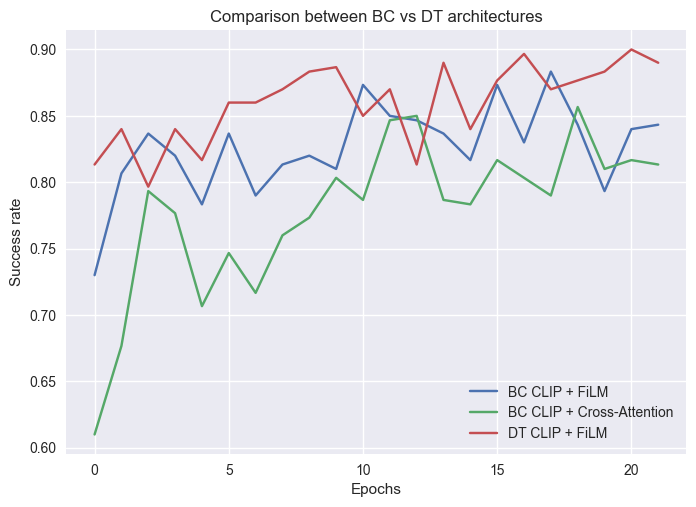

In [173]:
import matplotlib.pyplot as plt
import numpy as np

labels_mapping = {
    "IDT CLIP + FiLM": "DT CLIP + FiLM",
    "BC CLIP + FiLM": "BC CLIP + FiLM",
    "BC CLIP + Cross-Attention": "BC CLIP + Cross-Attention"
}
style = 'seaborn-v0_8'
keys_limit = 22
plt.style.use(style)
plt.figure()
for k, v in sorted_success_rate_ex1.items():
    epochs = list(v.keys())[:keys_limit]
    print(k,epochs)
    success_rate = list(v.values())[:keys_limit]
    label = labels_mapping[k]
    plt.plot(epochs, success_rate, label=label)
plt.legend(loc='lower right')
plt.title('Comparison between BC vs DT architectures')
plt.xlabel('Epochs')
plt.ylabel('Success rate')
plt.show()


## BC prompting

In [140]:
# BC prompting 


exps_names = ["BC CLIP + FiLM Prompting",
              "BC CLIP + FiLM Success Dataset"]

for run in run_list:
    if run.name in exps_names:
        print(run.name)

BC CLIP + FiLM Prompting
BC CLIP + FiLM Success Dataset
BC CLIP + FiLM Success Dataset


In [141]:

success_rate_ex2 = defaultdict(lambda: defaultdict(lambda: 0))

for run in run_list:
    if run.name in exps_names:
        # update the history
        for i in range(100):
            run = api.run(f"{entity}/{project}/{run.id}")
            run.update()
            df = run.history()
            df = df[df['success_rate'].notnull()]
            print(run.name, len(df['success_rate']))
            for row, v in df.iterrows():
                row_num = int(row)
                success_rate_ex2[run.name][v['epoch']] = v['success_rate']

BC CLIP + FiLM Prompting 2
BC CLIP + FiLM Prompting 3
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 2
BC CLIP + FiLM Prompting 2
BC CLIP + FiLM Prompting 0
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 4
BC CLIP + FiLM Prompting 2
BC CLIP + FiLM Prompting 2
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 0
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 2
BC CLIP + FiLM Prompting 2
BC CLIP + FiLM Prompting 0
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 0
BC CLIP + FiLM Prompting 0
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 3
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 2
BC CLIP + FiLM Prompting 0
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 2
BC CLIP + FiLM Prompting 0
BC CLIP + FiLM Prompting 1
BC CLIP + FiLM Prompting 5
B

In [142]:
success_rate_ex2['BC CLIP + FiLM'] = success_rate_ex1['BC CLIP + FiLM']



In [143]:
sorted_success_rate_ex2 = {}
for k, v in success_rate_ex2.items():
    # sort the values according to the keys
    sorted_success_rate_ex2[k] = dict(sorted(v.items()))

Text(0.5, 1.0, 'Comparison between different prompting strategies for BC')

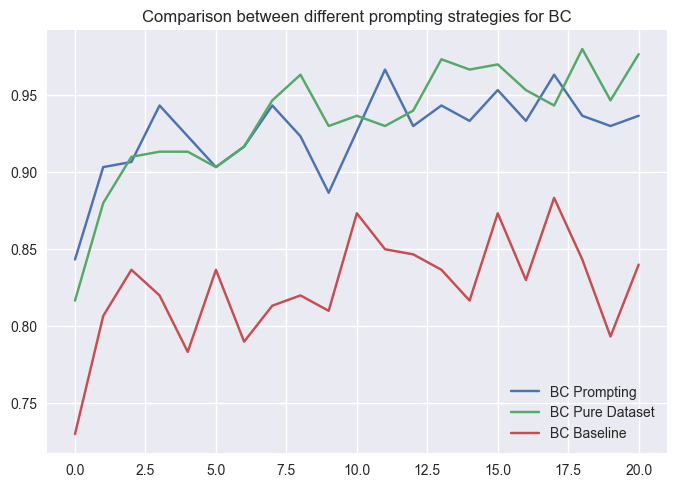

In [170]:
#plot the data
label_mapping = {
    "BC CLIP + FiLM Prompting": "BC Prompting",
    "BC CLIP + FiLM Success Dataset": "BC Pure Dataset",
    "BC CLIP + FiLM": "BC Baseline"
}
epochs_limit = 21
plt.style.use(style)
plt.figure()
# ligand in buttom right
for k, v in sorted_success_rate_ex2.items():
    epochs = list(v.keys())[:epochs_limit]
    success_rate = list(v.values())[:epochs_limit]
    label = label_mapping[k]
    plt.plot(epochs, success_rate, label=label)
plt.legend(loc='lower right')
plt.title('Comparison between different prompting strategies for BC')


In [145]:
exps_names = ["IDT Success Dataset",
              "IDT Prompting + RTG",
              "IDT Prompting"]

for run in run_list:
    if run.name in exps_names:
        print(run.name)

IDT Prompting
IDT Prompting + RTG
IDT Success Dataset


In [147]:

success_rate_ex3 = defaultdict(lambda: defaultdict(lambda: 0))

for run in run_list:
    if run.name in exps_names:
        # update the history
        for i in range(10):
            run = api.run(f"{entity}/{project}/{run.id}")
            run.update()
            df = run.history()
            df = df[df['success_rate'].notnull()]
            print(run.name, len(df['success_rate']))
            for row, v in df.iterrows():
                row_num = int(row)
                success_rate_ex3[run.name][v['epoch']] = v['success_rate']

IDT Prompting 20
IDT Prompting 20
IDT Prompting 20
IDT Prompting 20
IDT Prompting 20
IDT Prompting 20
IDT Prompting 20
IDT Prompting 20
IDT Prompting 20
IDT Prompting 20
IDT Prompting + RTG 20
IDT Prompting + RTG 20
IDT Prompting + RTG 20
IDT Prompting + RTG 20
IDT Prompting + RTG 20
IDT Prompting + RTG 20
IDT Prompting + RTG 20
IDT Prompting + RTG 20
IDT Prompting + RTG 20
IDT Prompting + RTG 20
IDT Success Dataset 20
IDT Success Dataset 20
IDT Success Dataset 20
IDT Success Dataset 20
IDT Success Dataset 20
IDT Success Dataset 20
IDT Success Dataset 20
IDT Success Dataset 20
IDT Success Dataset 20
IDT Success Dataset 20


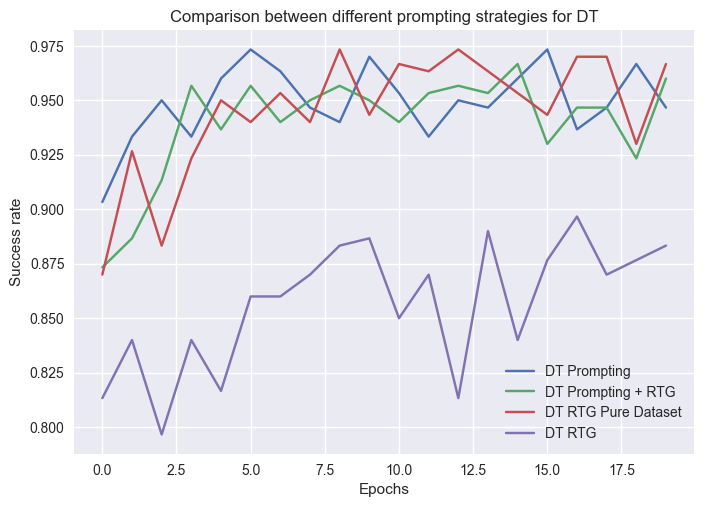

In [171]:
# sort the data
models_mapping ={"IDT CLIP + FiLM": "DT RTG",
                 "IDT Success Dataset": "DT RTG Pure Dataset",
                 "IDT Prompting + RTG": "DT Prompting + RTG",
                 "IDT Prompting": "DT Prompting"}
sorted_success_rate_ex3 = {}
for k, v in success_rate_ex3.items():
    # sort the values according to the keys
    sorted_success_rate_ex3[k] = dict(sorted(v.items()))

sorted_success_rate_ex3["IDT CLIP + FiLM"] = sorted_success_rate_ex1["IDT CLIP + FiLM"]

#plot the data
epochs_limit = 20
plt.style.use(style)
plt.figure()
for k, v in sorted_success_rate_ex3.items():
    epochs = list(v.keys())[:epochs_limit]
    success_rate = list(v.values())[:epochs_limit]
    label = models_mapping[k]
    plt.plot(epochs, success_rate, label=label)
plt.legend(loc='lower right')
plt.title('Comparison between different prompting strategies for DT')
plt.xlabel('Epochs')
plt.ylabel('Success rate')
plt.show()
    

In [1]:
import re
from collections import defaultdict


def get_exp_data(file_dir):
    #read the file 
    with open(file_dir, 'r') as f:
        lines = f.readlines()
    gpu = 0
    # get the mean and std from the text with pattern: success rate in coffee-button-v2 with mean 0.39999999999999997 and std 0.43204937989385733
    # put the data in a dictionary with the task name as the key and the mean and std as the values
    epoch = 0
    data = defaultdict(lambda: {})
    for line in lines:
        if "epoch" in line:
            search = re.search(r' epoch (.*)  evaluation', line)
            if search is not None:
                epoch = int(search.group(1))
        if "success rate in" in line:
            task_name = re.search(r'success rate in (.*) with mean', line).group(1)
            mean = float(re.search(r'mean (.*) and std', line).group(1))
            std = float(re.search(r'std (.*) and', line).group(1))
            data[epoch][task_name] = (mean, std)
        
    return data


In [2]:
def get_overall_mean_std(means, stds):
    mean = np.mean(means)
    var = np.mean([std**2 for std in stds]) + np.var(means)
    std = np.sqrt(var)
    return mean, std
def get_exp_data(file_dir):
    #read the file as text and split the text by the "total std" string
    with open(file_dir, 'r') as f:
        evals = f.read().split("total mean")
    data = defaultdict(lambda: {})
    for eval in evals:
        search = re.search(r'epoch (.*)  evaluation', eval)
        if search is None: 
            print("no epoch found in ",eval)
            continue
            
        epoch = int(search.group(1))
        lines = eval.split("\n")
        for line in lines:
            if "success rate in" in line: # line example:  58 success rate in coffee-button-v2 with mean 0.7999999999999999 and std 0.16329931618554522 and detailed [[0, 0.8], [1, 1.0], [2, 0.6]]
                task_name = re.search(r'success rate in (.*) with mean', line).group(1)
                # detailed = re.search(r'and detailed (.*)', line)
                # # convert the [[0, 0.8], [1, 1.0], [2, 0.6]] into a list of lists
                # detailed = detailed.group(1).split("],")
                # detailed = [re.sub(r'[\[\]]', '', x) for x in detailed]
                # detailed = [x.split(",") for x in detailed]
                # detailed = [[int(x[0]), float(x[1])] for x in detailed]

                # # mean to samples 
                # means = [x[1] for x in detailed]
                # samples = []
                # for mean in means:
                #     s = [1] * int(mean * 10)
                #     s += [0] * (10 - len(s))
                #     samples.append(s)
                
                # stds = [np.std(s) for s in samples]
                # mean, std = get_overall_mean_std(means, stds)
                mean = float(re.search(r'mean (.*) and std', line).group(1))
                std = float(re.search(r'std (.*) and', line).group(1))
                data[epoch][task_name] = (mean, std)
    return data

In [3]:
# glob all the txt files
import glob
all_data = {}
for file_dir in glob.glob("results_text/*"):
    data = get_exp_data(file_dir)
    file_name = file_dir.split("/")[-1].split(".")[0]
    all_data[file_name] = data


no epoch found in   0.8466666666666667
423 total std 0.11175369742826806
no epoch found in   0.89
768 total std 0.06333333333333332
no epoch found in   0.96
806 total std 0.038873012632302036
no epoch found in   0.9133333333333333
443 total std 0.0896908269804914
no epoch found in   0.9466666666666667
238 total std 0.05811865258054231
no epoch found in   0.8
358 success rate overall mean 0.8 with std 0.18073922282301236
no epoch found in   0.84
419 total std 0.11999999999999998
420 Epoch 23:  69%|████████████████████████████████████████████████████████████
no epoch found in   0.9466666666666667
826 total std 0.04268749491621901




no epoch found in   0.9666666666666667
814 total std 0.04472135954999579


In [4]:
# check the number of epochs of each experiment
for k, v in all_data.items():
    print(k, (v.keys()))

bc_cross_attention dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
dt_film dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
dt_prompting_rtg dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
bc_prompting dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
bc_success dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
bc_base dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
bc_film dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])
dt_prompting dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
dt_success dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])


In [5]:
import numpy as np
def get_exp_mean_std(exp_data, epoch_limit=20):
    epochs_means = []
    epochs_stds = []
    for epoch, data in exp_data.items():
        if epoch >= epoch_limit: break
        means = []
        stds = []
        for task_name, (mean, std) in data.items():
            means.append(mean)
            stds.append(std)
        
        means = np.array(means)
        stds = np.array(stds)
        mean_overall = np.mean(means)
        epochs_means.append(mean_overall)
        n = len(means)
        # calculate the overall std using the means and the stds of each task
        variance_overall = (1.0/n) * np.sum(stds**2 + (means - mean_overall)**2)
        std_overall = np.sqrt(variance_overall)
        epochs_stds.append(std_overall)
    
    return epochs_means, epochs_stds

for key , value in all_data.items():
    print('exp:',key)
    means, stds = get_exp_mean_std(value)
    print(len(means), len(stds))


exp: bc_cross_attention
20 20
exp: dt_film
20 20
exp: dt_prompting_rtg
20 20
exp: bc_prompting
20 20
exp: bc_success
20 20
exp: bc_base
20 20
exp: bc_film
20 20
exp: dt_prompting
20 20
exp: dt_success
20 20


In [39]:
import matplotlib.pyplot as plt
def plot_exp_mean_std(exps_epoch_success_rates_means, exps_epoch_success_rates_stds, exp_names, colors, names_mapping, title):
    plt.style.use('seaborn-v0_8')
    # plot the data
    width = 1
    # set figure size
    plt.figure(figsize=(15, 10))
    # set font
    plt.rcParams.update({'font.size': 100})
    for exp_name, epoch_success_rates_means, epoch_success_rates_stds, color in zip(exp_names, exps_epoch_success_rates_means, exps_epoch_success_rates_stds, colors):
        exp_name = names_mapping[exp_name]
        x_axis_steps = np.arange(1,len(epoch_success_rates_means)+1)
        plt.plot(x_axis_steps, epoch_success_rates_means, color=color, label=exp_name)
        plt.fill_between(x_axis_steps, epoch_success_rates_means - epoch_success_rates_stds, epoch_success_rates_means + epoch_success_rates_stds, alpha=0.1, color=color)
        # put contours on the error fillings
        plt.plot(x_axis_steps, epoch_success_rates_means - epoch_success_rates_stds, color=color, alpha=0.25)
        plt.plot(x_axis_steps, epoch_success_rates_means + epoch_success_rates_stds, color=color, alpha=0.25)       
        # # error bars with caps 
        # (_,caps,_) = plt.errorbar(x_axis_steps, epoch_success_rates_means, yerr=epoch_success_rates_stds, elinewidth = 0.1,  capsize = 5, color= color)
        # for cap in caps:
        #     cap.set_markeredgewidth(1)  
        # bin plot
        # plt.errorbar(x_axis_steps, epoch_success_rates_means, yerr=epoch_success_rates_stds, fmt='o', color=color, label=exp_name)
    plt.legend(loc='lower right')
    # x axis should be from 1 to max + 1 with intger steps
    # y from 0 to 1 with 0.1 steps
    plt.xticks(x_axis_steps)
    # plt.yticks(np.arange(0, 1.1, 0.1))
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Success Rates')
    plt.show()


bc_base [0.7133333333333333, 0.7500000000000001, 0.8066666666666666, 0.7933333333333334, 0.7233333333333334, 0.7899999999999999, 0.7933333333333333, 0.78, 0.8166666666666667, 0.7733333333333333, 0.8033333333333333, 0.8166666666666667, 0.8433333333333334, 0.7766666666666666, 0.7666666666666666, 0.8033333333333331, 0.8033333333333331, 0.8133333333333332, 0.8266666666666665, 0.8]
bc_cross_attention [0.6133333333333333, 0.7066666666666668, 0.7733333333333333, 0.7266666666666668, 0.7200000000000001, 0.7266666666666667, 0.7266666666666667, 0.78, 0.8, 0.7999999999999998, 0.7733333333333333, 0.8533333333333335, 0.8733333333333333, 0.7799999999999999, 0.7866666666666667, 0.8066666666666666, 0.7933333333333332, 0.8, 0.8533333333333333, 0.8]
bc_film [0.7266666666666667, 0.78, 0.8866666666666667, 0.7799999999999999, 0.8266666666666665, 0.86, 0.78, 0.78, 0.82, 0.7933333333333332, 0.8733333333333333, 0.8399999999999999, 0.8533333333333332, 0.8533333333333333, 0.82, 0.8666666666666666, 0.833333333333

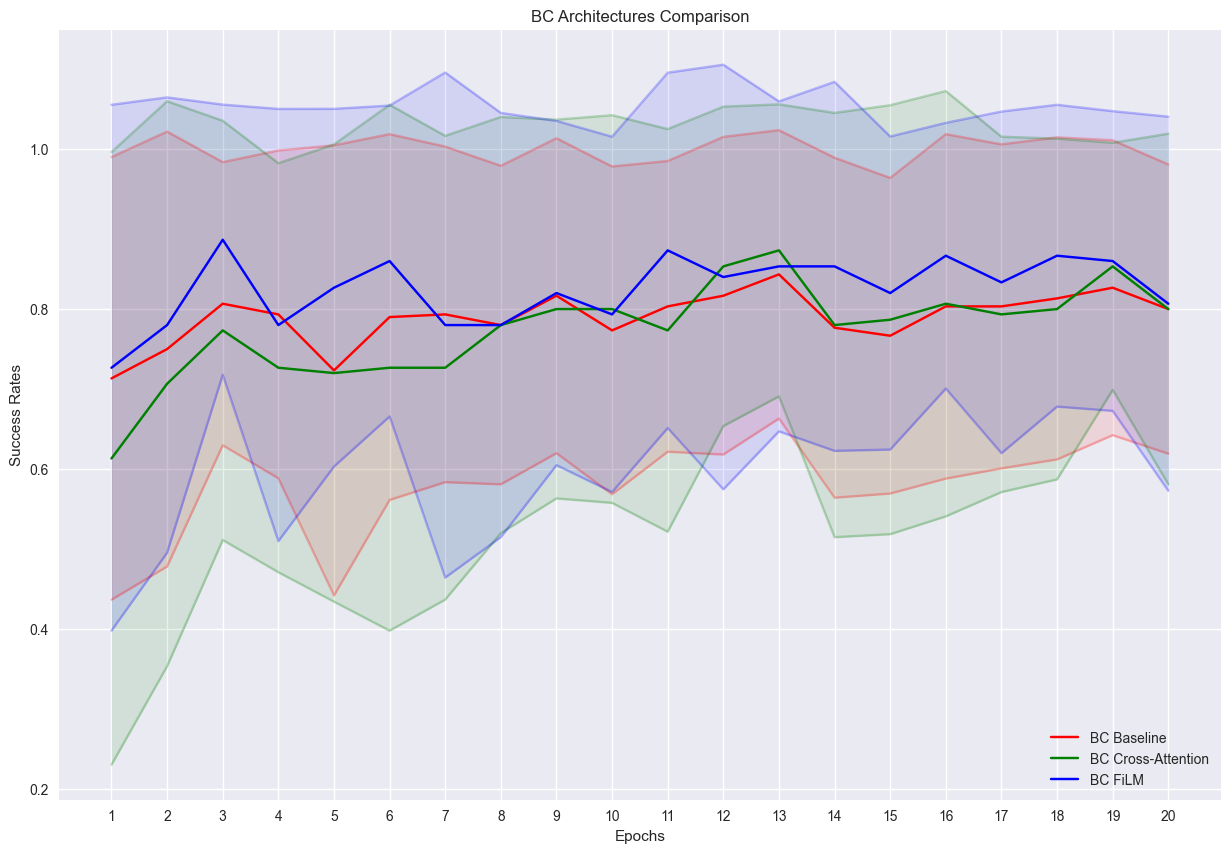

In [40]:
title = "BC Architectures Comparison"
experiments_names_mapping = {
    "bc_base": "BC Baseline",
    "bc_cross_attention": "BC Cross-Attention",
    "bc_film": "BC FiLM"
}
exps_to_plot = [(exp_name, all_data[exp_name]) for exp_name in experiments_names_mapping.keys()]
exps_means = []
exps_stds = []
task_names = []
for key , value in exps_to_plot:
    means, stds = get_exp_mean_std(value)
    exps_means.append(np.array(means))
    exps_stds.append(np.array(stds))
    task_names.append(key)
    print(key, means)
colors = ['r', 'g', 'b']
plot_exp_mean_std(exps_means, exps_stds, task_names, colors, experiments_names_mapping, title)
    

bc_film [0.7266666666666667, 0.78, 0.8866666666666667, 0.7799999999999999, 0.8266666666666665, 0.86, 0.78, 0.78, 0.82, 0.7933333333333332, 0.8733333333333333, 0.8399999999999999, 0.8533333333333332, 0.8533333333333333, 0.82, 0.8666666666666666, 0.8333333333333333, 0.8666666666666668, 0.86, 0.8066666666666666]
dt_film [0.8133333333333332, 0.8399999999999999, 0.7966666666666666, 0.8400000000000001, 0.8166666666666668, 0.86, 0.86, 0.8700000000000001, 0.8833333333333334, 0.8866666666666667, 0.85, 0.8700000000000001, 0.8133333333333332, 0.8900000000000002, 0.8400000000000001, 0.8766666666666667, 0.8966666666666667, 0.8700000000000001, 0.8766666666666667, 0.8833333333333334]


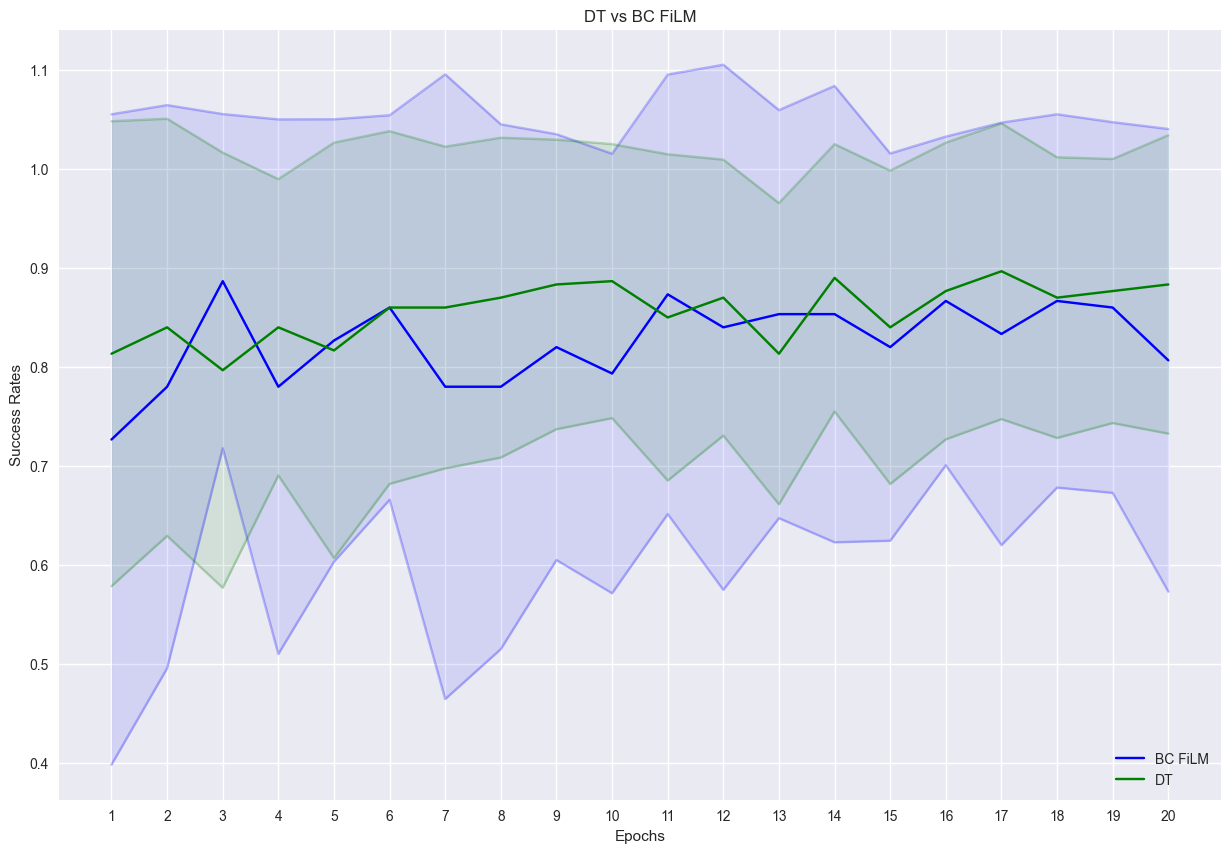

In [41]:
# DT vs BC film
title = "DT vs BC FiLM"
experiments_names_mapping = {
    "bc_film": "BC FiLM",
    "dt_film": "DT"
}
exps_to_plot = [(exp_name, all_data[exp_name]) for exp_name in experiments_names_mapping.keys()]
exps_means = []
exps_stds = []

task_names = []
for key , value in exps_to_plot:
    means, stds = get_exp_mean_std(value)
    exps_means.append(np.array(means))
    exps_stds.append(np.array(stds))
    task_names.append(key)
    print(key, means)
colors = ['b', 'g']
plot_exp_mean_std(exps_means, exps_stds, task_names, colors, experiments_names_mapping, title)




bc_film [0.7266666666666667, 0.78, 0.8866666666666667, 0.7799999999999999, 0.8266666666666665, 0.86, 0.78, 0.78, 0.82, 0.7933333333333332, 0.8733333333333333, 0.8399999999999999, 0.8533333333333332, 0.8533333333333333, 0.82, 0.8666666666666666, 0.8333333333333333, 0.8666666666666668, 0.86, 0.8066666666666666]
bc_prompting [0.8400000000000001, 0.9066666666666666, 0.9066666666666666, 0.9466666666666667, 0.9133333333333333, 0.9133333333333333, 0.9199999999999999, 0.9466666666666667, 0.9066666666666666, 0.8800000000000001, 0.9266666666666667, 0.96, 0.9333333333333332, 0.9399999999999998, 0.9400000000000001, 0.9466666666666667, 0.9333333333333332, 0.9666666666666666, 0.9266666666666665, 0.9266666666666665]
bc_success [0.8266666666666668, 0.9266666666666665, 0.9133333333333333, 0.9266666666666665, 0.9, 0.8933333333333333, 0.9400000000000001, 0.9466666666666667, 0.96, 0.9333333333333332, 0.9400000000000001, 0.9133333333333333, 0.9533333333333334, 0.9800000000000001, 0.9799999999999999, 0.96, 

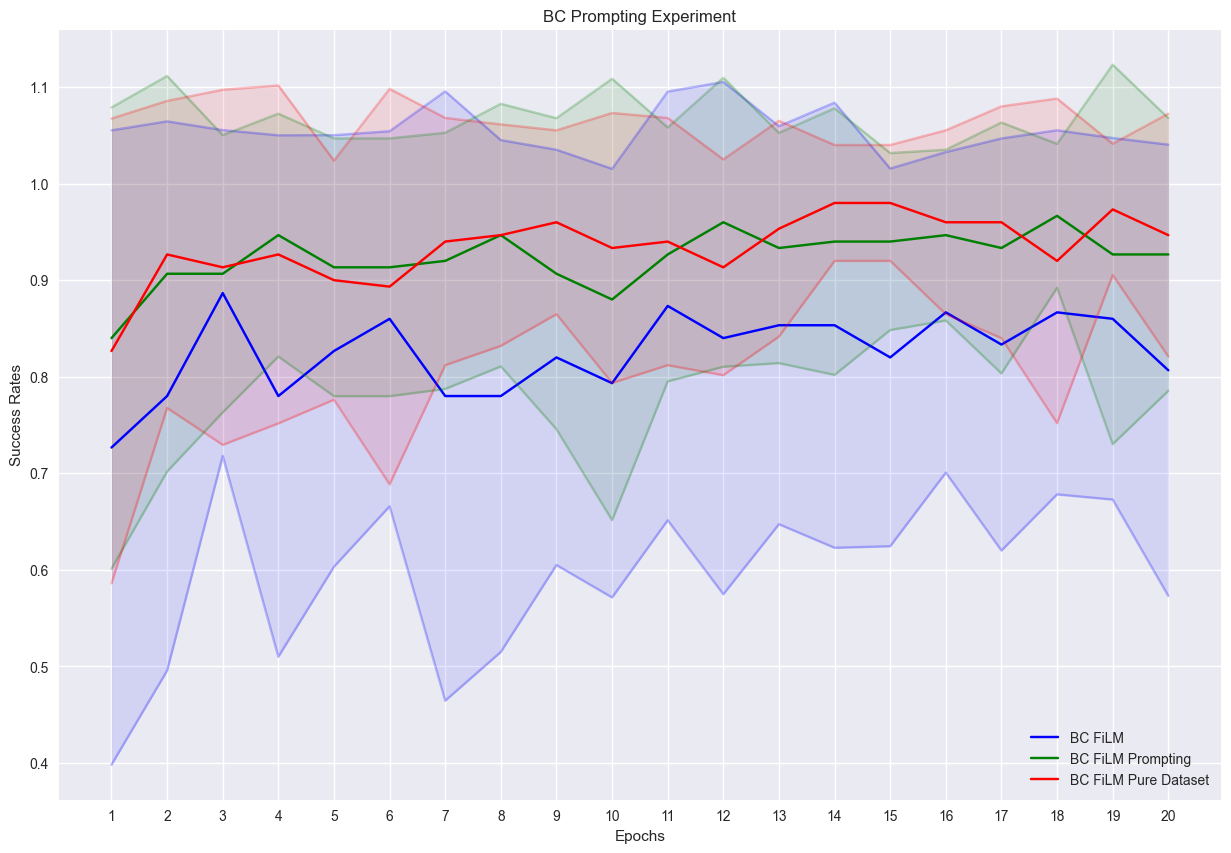

In [42]:
# bc prompting experiments
title = "BC Prompting Experiment"
experiments_names_mapping = {
    "bc_film": "BC FiLM",
    "bc_prompting": "BC FiLM Prompting",
    "bc_success": "BC FiLM Pure Dataset",
}
colors = ['b', 'g', 'r']
exps_to_plot = [(exp_name, all_data[exp_name]) for exp_name in experiments_names_mapping.keys()]
exps_means = []
exps_stds = []
task_names = []
for key , value in exps_to_plot:
    means, stds = get_exp_mean_std(value)
    exps_means.append(np.array(means))
    exps_stds.append(np.array(stds))
    task_names.append(key)
    print(key, means)
plot_exp_mean_std(exps_means, exps_stds, task_names, colors, experiments_names_mapping, title)

dt_film [0.8133333333333332, 0.8399999999999999, 0.7966666666666666, 0.8400000000000001, 0.8166666666666668, 0.86, 0.86, 0.8700000000000001, 0.8833333333333334, 0.8866666666666667, 0.85, 0.8700000000000001, 0.8133333333333332, 0.8900000000000002, 0.8400000000000001, 0.8766666666666667, 0.8966666666666667, 0.8700000000000001, 0.8766666666666667, 0.8833333333333334]
dt_prompting [0.9033333333333331, 0.9333333333333333, 0.95, 0.9333333333333333, 0.96, 0.9733333333333333, 0.9633333333333333, 0.9466666666666667, 0.9400000000000001, 0.9700000000000001, 0.9533333333333334, 0.9333333333333333, 0.95, 0.9466666666666667, 0.96, 0.9733333333333334, 0.9366666666666668, 0.9466666666666667, 0.9814814814814815, 0.9466666666666667]
dt_prompting_rtg [0.8733333333333333, 0.8866666666666667, 0.9133333333333334, 0.9566666666666667, 0.9366666666666665, 0.9566666666666667, 0.9400000000000001, 0.95, 0.9566666666666667, 0.95, 0.9400000000000001, 0.9533333333333334, 0.9566666666666667, 0.9533333333333334, 0.966

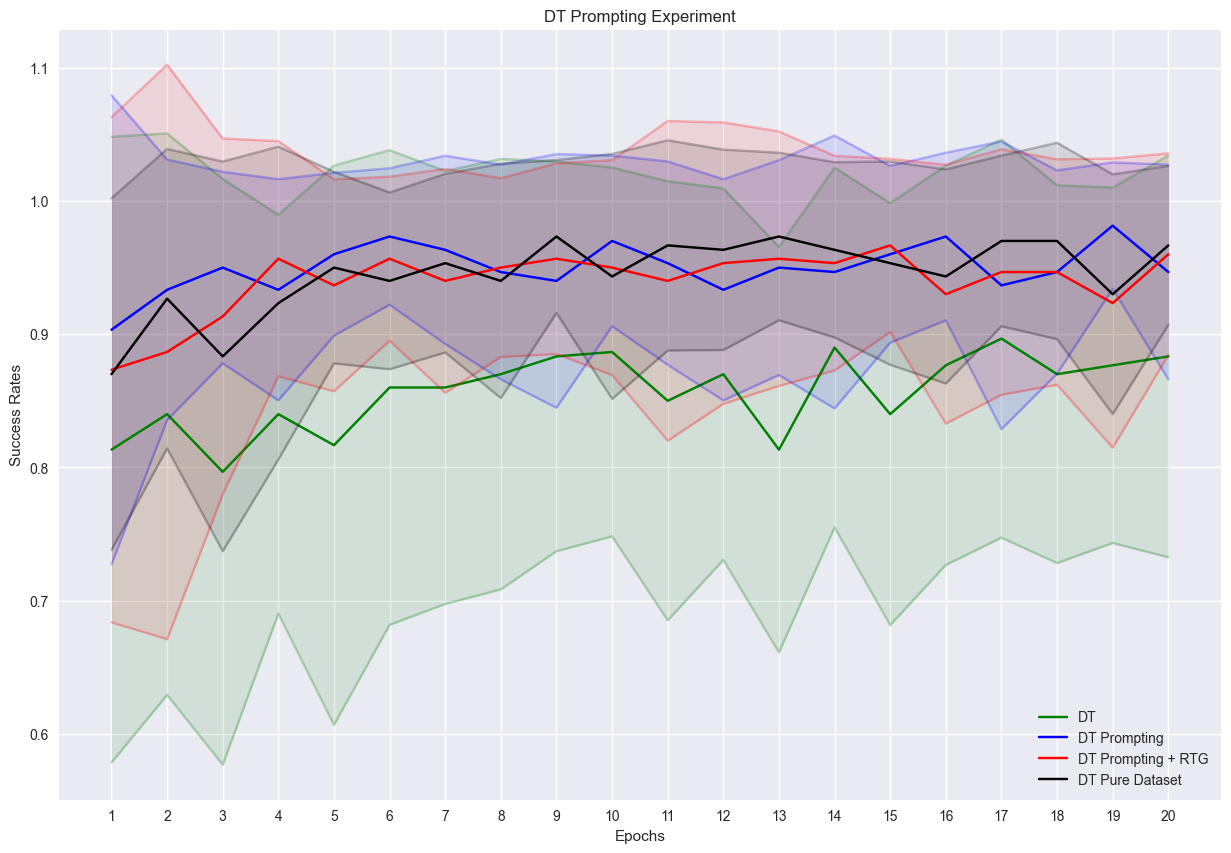

In [43]:
# DT prompting experiments
title = "DT Prompting Experiment"
experiments_names_mapping = {
    "dt_film": "DT",
    "dt_prompting": "DT Prompting",
    "dt_prompting_rtg": "DT Prompting + RTG",
    "dt_success": "DT Pure Dataset",
}
colors = ['g', 'b', 'r', 'k']
exps_to_plot = [(exp_name, all_data[exp_name]) for exp_name in experiments_names_mapping.keys()]
exps_means = []
exps_stds = []
task_names = []
for key , value in exps_to_plot:
    means, stds = get_exp_mean_std(value)
    exps_means.append(np.array(means))
    exps_stds.append(np.array(stds))
    task_names.append(key)
    print(key, means)
plot_exp_mean_std(exps_means, exps_stds, task_names, colors, experiments_names_mapping, title)
